In [1]:
import pypsa

In [2]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline
import pandas as pd

In [3]:
n = pypsa.Network("results/hiB_testHiRes/postnetworks/elec_s_37_lvopt__Co2Lm0p05-5H-T-H-B0p0-I-S600_2050.nc")

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2Lm0p05-5H-T-H-B0p0-I-S600_2050.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/plot.py:159: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection=projection)
INFO:numexpr.utils:NumExpr defaulting to 6 threads.


(<matplotlib.collections.PatchCollection at 0x7f35405e5b20>,
 <matplotlib.collections.LineCollection at 0x7f353f35a5b0>)

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


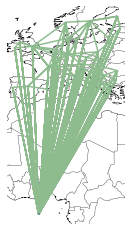

In [4]:
n.plot()

In [5]:
n.objective / 1e9 #billion EUR p.a.

741.0761525190055

In [6]:
import cartopy.crs as ccrs

In [7]:
loading = (n.links_t.p0.abs().mean().sort_index() / (n.links.p_nom_opt*n.links.p_max_pu).sort_index()).fillna(0.)
# PlateCarree, Mercator, Orthographic\n",
notdc_b = n.links.index[n.links.carrier != "DC"]                        
loading[notdc_b] = 0

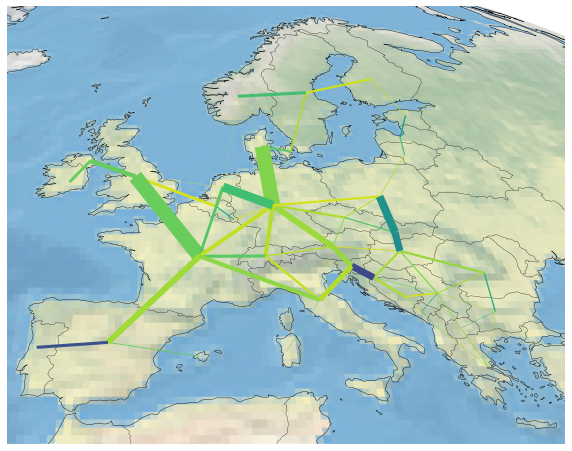

In [8]:
fig,ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.Orthographic()},
    )

dc_b = n.links.index[n.links.carrier == "DC"]
notdc_b = n.links.index[n.links.carrier != "DC"]
n.links.loc[dc_b, "temp"] = n.links.p_nom_opt
n.links.loc[notdc_b, "temp"] = 0
#n.links.temp.fillna(0.01)
    
n.plot(ax=ax,
          bus_colors='gray',
          branch_components=["Link"],
          link_widths=n.links.temp / 5e3,
          link_colors=loading,
          link_cmap=plt.cm.viridis,
          color_geomap=True,
          bus_sizes=0)
#ax.axis('on');\n",
#ax.set(xlim=(0, 40), ylim=(-50, 50))\n",
#ax.xlim\n",
#ax.set_extent([-1058286, 2449341, 3700000, 6067277], crs=ccrs.Orthographic())\n",
ax.set_extent([-1058286, 2949341, 4000000, 12067277], crs=ccrs.Mercator())

ax.stock_img()
ax.get_extent()
fig.savefig(fname="grid.png")

In [9]:
n.generators.p_nom_opt

name
AL0 0 offwind-ac         0.015276
AL0 0 onwind             0.015602
AL0 0 solar          17868.707208
AT0 0 onwind             0.032205
AT0 0 ror             4478.505031
                        ...      
SK0 0 onwind             0.042093
SK0 0 ror              641.330000
SK0 0 solar              0.440233
EU gas              814794.679088
EU oil              969562.149129
Name: p_nom_opt, Length: 152, dtype: float64

In [7]:
n.links.loc[n.links.carrier=='electrofuel'].p_nom_opt.sort_values(ascending=False).head(50)

name
GB5 0 Fischer-Tropsch    34439.076090
GB4 0 Fischer-Tropsch     8654.344486
IE4 0 Fischer-Tropsch     2234.940923
MK0 0 Fischer-Tropsch     1500.105472
AL0 0 Fischer-Tropsch      507.366756
DK0 0 Fischer-Tropsch      502.859217
DK3 0 Fischer-Tropsch      108.237935
RS0 0 Fischer-Tropsch        0.779615
NL0 0 Fischer-Tropsch        0.512308
RO0 0 Fischer-Tropsch        0.339493
BE0 0 Fischer-Tropsch        0.332495
ME0 0 Fischer-Tropsch        0.325424
EE6 0 Fischer-Tropsch        0.233029
LU0 0 Fischer-Tropsch        0.226454
FR0 0 Fischer-Tropsch        0.210376
BA0 0 Fischer-Tropsch        0.200771
DE0 0 Fischer-Tropsch        0.178395
CH0 0 Fischer-Tropsch        0.169388
SE3 0 Fischer-Tropsch        0.168488
CZ0 0 Fischer-Tropsch        0.155238
AT0 0 Fischer-Tropsch        0.153254
SI0 0 Fischer-Tropsch        0.149312
LV6 0 Fischer-Tropsch        0.148259
FI3 0 Fischer-Tropsch        0.146046
NO3 0 Fischer-Tropsch        0.140711
LT6 0 Fischer-Tropsch        0.137048
PL0 0 F

In [63]:
n.links.groupby("carrier").p_nom_opt.sum().tail(50) / 1e3 #GW

carrier
battery charger                                       2.146235e+01
battery discharger                                    2.190492e+01
biomass to liquid                                     9.167671e+01
co2 vent                                              8.262292e-08
digestible biomass                                    1.622111e+02
digestible biomass to gas                             1.617350e+02
digestible biomass to hydrogen                        1.517230e-05
electrofuel                                           3.385391e+02
gas for industry                                      2.490142e-06
gas for industry CC                                   4.826357e+01
lowT process steam H2                                 9.437561e-01
lowT process steam methane                            9.867915e-05
lowT process steam methane CC                         3.501909e+00
lowT process steam solid biomass                      2.875785e-04
lowT process steam solid biomass CC                   

In [9]:
n.stores_t.e.filter(regex='co2 stored') /1e6#.sum() / 1e6 #MtCO2

name,co2 stored
name,
2013-01-01 00:00:00,3.121619
2013-01-05 01:00:00,7.416968
2013-01-09 02:00:00,11.767829
2013-01-13 03:00:00,15.547928
2013-01-17 04:00:00,19.400869
...,...
2013-12-14 14:00:00,289.669705
2013-12-18 15:00:00,292.791321
2013-12-22 16:00:00,295.912933


In [10]:
n.stores_t.p.filter(regex='co2 stored') #tCO2

name,co2 stored
name,
2013-01-01 00:00:00,-32181.641878
2013-01-05 01:00:00,-44281.946106
2013-01-09 02:00:00,-44854.236772
2013-01-13 03:00:00,-38970.088753
2013-01-17 04:00:00,-39721.045950
...,...
2013-12-14 14:00:00,-32181.640334
2013-12-18 15:00:00,-32181.608585
2013-12-22 16:00:00,-32181.568589


In [11]:
n.stores.e_nom_opt

name
co2 atmosphere           9.197428e+08
co2 stored               3.000000e+08
EU gas Store             7.420744e+08
DE0 0 H2 Store           5.257002e+04
DK0 0 H2 Store           2.754359e+05
                             ...     
RO0 0 battery storage    9.211875e+04
RS0 0 battery storage    6.898005e+04
SE3 0 battery storage    9.351169e+04
SI0 0 battery storage    2.374688e+04
SK0 0 battery storage    3.717263e+04
Name: e_nom_opt, Length: 575, dtype: float64

In [14]:
n.links.p_nom_opt.filter(regex='DE.*lowT')

name
DE0 0 solid biomass for lowT industry       9056.016375
DE0 0 solid biomass for lowT industry CC    1872.064998
DE0 0 methane for lowT industry             3134.122016
DE0 0 methane for lowT industry CC             0.058255
DE0 0 H2 for lowT industry                     0.007058
Name: p_nom_opt, dtype: float64

In [4]:
n.links.loc[n.links.carrier=='digestable biomass to gas'].p_nom_opt.sort_values(ascending=False).head(50)

name
FI3 0 digestable biomass    0.006844
CH0 0 digestable biomass    0.006798
DK3 0 digestable biomass    0.006772
AT0 0 digestable biomass    0.006742
NO3 0 digestable biomass    0.006651
SI0 0 digestable biomass    0.006594
DK0 0 digestable biomass    0.006537
SE3 0 digestable biomass    0.006518
PT0 0 digestable biomass    0.006510
GB5 0 digestable biomass    0.006218
BE0 0 digestable biomass    0.006191
GR0 0 digestable biomass    0.006153
NL0 0 digestable biomass    0.006142
HU0 0 digestable biomass    0.006121
PL0 0 digestable biomass    0.006081
ES2 0 digestable biomass    0.006055
IT1 0 digestable biomass    0.006024
CZ0 0 digestable biomass    0.005976
GB4 0 digestable biomass    0.005897
IT0 0 digestable biomass    0.005857
ES0 0 digestable biomass    0.005844
DE0 0 digestable biomass    0.005698
SK0 0 digestable biomass    0.004437
LT6 0 digestable biomass    0.004293
LV6 0 digestable biomass    0.004264
MK0 0 digestable biomass    0.004134
EE6 0 digestable biomass    0.004

In [4]:
n.links.p_nom_opt.filter(regex='SE.*digestable').head(50)

name
SE3 0 manureslurry digestable biomass          0.235144
SE3 0 municipal biowaste digestable biomass    0.231566
SE3 0 sewage sludge digestable biomass         0.251140
SE3 0 straw digestable biomass                 0.238556
SE3 0 digestable biomass                       1.006718
Name: p_nom_opt, dtype: float64

In [5]:
n.links.p_nom_opt.filter(regex='DE.*solid').head(50) #MW

name
DE0 0 solid biomass for lowT industry         14357.228561
DE0 0 solid biomass for lowT industry CC          0.010099
DE0 0 poplar solid biomass                     2630.183796
DE0 0 forest residues solid biomass           45506.326731
DE0 0 industry wood residues solid biomass    11638.149155
DE0 0 import1 solid biomass                    5147.442344
DE0 0 import2 solid biomass                   24848.898602
DE0 0 import3 solid biomass                     378.357089
DE0 0 import4 solid biomass                     346.623183
DE0 0 import5 solid biomass                   23857.073954
DE0 0 import6 solid biomass                     485.577658
DE0 0 import7 solid biomass                   20692.658116
DE0 0 import8 solid biomass                    1776.339758
DE0 0 import9 solid biomass                     379.322306
DE0 0 solid biomass to gas                        0.001013
DE0 0 urban central solid biomass CHP         96616.740410
DE0 0 urban central solid biomass CHP CC          0

In [13]:
n.links.p_nom_opt.filter(regex='Tropsch').sum()#head(50) #GW?

47952.264855138965

In [13]:
n.components["Link"]["attrs"]

,type,unit,default,description,status,static,varying,typ,dtype
attribute,,,,,,,,,
name,string,NaN,,Unique name,Input (required),True,False,<class 'str'>,object
bus0,string,NaN,,Name of first bus to which link is attached.,Input (required),True,False,<class 'str'>,object
bus1,string,NaN,,Name of second bus to which link is attached.,Input (required),True,False,<class 'str'>,object
type,string,NaN,,Placeholder for link type. Not yet implemented.,Input (optional),True,False,<class 'str'>,object
efficiency,static or series,per unit,1.0,Efficiency of power transfer from bus0 to bus1...,Input (optional),True,True,<class 'float'>,float64
p_nom,float,MVA,0.0,Limit of active power which can pass through l...,Input (optional),True,False,<class 'float'>,float64
p_nom_extendable,boolean,NaN,False,Switch to allow capacity p_nom to be extended ...,Input (optional),True,False,<class 'bool'>,bool
p_nom_min,float,MVA,0.0,"If p_nom is extendable in OPF, set its minimum...",Input (optional),True,False,<class 'float'>,float64
p_nom_max,float,MVA,inf,"If p_nom is extendable in OPF, set its maximum...",Input (optional),True,False,<class 'float'>,float64


In [21]:
n.links_t.p0.filter(regex='DE.* solid biomass')#.sum().sum()*97 * 3.6/1e9 #EJ

name,DE0 0 forest residues solid biomass,DE0 0 import1 solid biomass,DE0 0 import2 solid biomass,DE0 0 import3 solid biomass,DE0 0 import4 solid biomass,DE0 0 import5 solid biomass,DE0 0 import6 solid biomass,DE0 0 import7 solid biomass,DE0 0 import8 solid biomass,DE0 0 import9 solid biomass,DE0 0 industry wood residues solid biomass,DE0 0 poplar solid biomass,DE0 0 solid biomass for lowT industry,DE0 0 solid biomass for lowT industry CC,DE0 0 solid biomass to gas,DE0 0 urban central solid biomass CHP,DE0 0 urban central solid biomass CHP CC
name,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,18365.486718,15860.680969,17277.366280,167.201080,141.217748,11900.082309,0.221743,0.109521,0.060070,0.058589,5533.874260,897.255408,14357.207954,0.003750,0.000545,55682.953405,0.003758
2013-01-05 01:00:00,29867.528220,28754.061054,27091.888280,168.050244,141.962337,18108.761481,0.221457,0.109261,0.059286,0.058579,6111.378892,833.681885,14357.208584,0.003782,0.000553,96617.093454,0.009334
2013-01-09 02:00:00,29710.897779,28780.898340,27168.933344,168.844209,142.855542,18152.767205,0.222748,0.110095,0.059842,0.058939,6116.530876,835.581588,14357.208580,0.003746,0.000550,96617.093545,0.008691
2013-01-13 03:00:00,29745.668948,28868.246890,27106.170250,167.667346,141.529655,18119.086166,0.220817,0.108879,0.058993,0.058408,6096.524921,832.426043,14357.208648,0.003758,0.000556,96617.095276,0.013743
2013-01-17 04:00:00,29935.381171,28860.472829,26979.874042,166.945932,140.720873,18048.440371,0.219634,0.108149,0.058537,0.058038,6113.565585,831.920995,14357.208643,0.003805,0.000561,96617.094825,0.013051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-14 14:00:00,1176.138426,104857.875735,1496.874376,146.738753,135.324824,1410.126524,0.210873,0.106095,0.056713,0.056867,1282.305344,571.917680,14357.207731,0.003933,0.000556,96617.070183,0.004774
2013-12-18 15:00:00,1406.560482,68191.533618,1486.025056,146.857124,135.474389,1400.082860,0.211227,0.106236,0.057079,0.056910,1283.742690,571.119772,14357.207685,0.003935,0.000556,60161.166400,0.003752
2013-12-22 16:00:00,1614.143726,56069.964698,1484.369895,147.315789,135.990051,1399.164117,0.212246,0.106753,0.057641,0.057122,1300.319231,571.648162,14357.207575,0.003930,0.000554,48262.688549,0.003747


In [26]:
n.components["Link"]["attrs"]

,type,unit,default,description,status,static,varying,typ,dtype
attribute,,,,,,,,,
name,string,NaN,,Unique name,Input (required),True,False,<class 'str'>,object
bus0,string,NaN,,Name of first bus to which link is attached.,Input (required),True,False,<class 'str'>,object
bus1,string,NaN,,Name of second bus to which link is attached.,Input (required),True,False,<class 'str'>,object
type,string,NaN,,Placeholder for link type. Not yet implemented.,Input (optional),True,False,<class 'str'>,object
efficiency,static or series,per unit,1.0,Efficiency of power transfer from bus0 to bus1...,Input (optional),True,True,<class 'float'>,float64
p_nom,float,MVA,0.0,Limit of active power which can pass through l...,Input (optional),True,False,<class 'float'>,float64
p_nom_extendable,boolean,NaN,False,Switch to allow capacity p_nom to be extended ...,Input (optional),True,False,<class 'bool'>,bool
p_nom_min,float,MVA,0.0,"If p_nom is extendable in OPF, set its minimum...",Input (optional),True,False,<class 'float'>,float64
p_nom_max,float,MVA,inf,"If p_nom is extendable in OPF, set its maximum...",Input (optional),True,False,<class 'float'>,float64


<AxesSubplot:xlabel='name'>

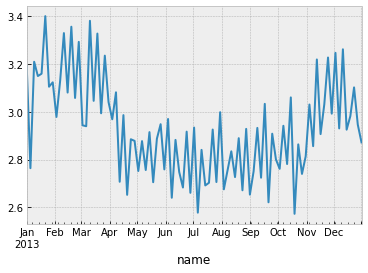

In [17]:
(n.loads_t.p_set.filter(regex='DE.*transport oil').sum(axis=1) *97 * 3.6 / 1e6).plot() #PJ

In [16]:
n.loads_t.p.filter(regex='electricity').sum().sum()*3.6/1e6

63.47249999999998

In [14]:
n.stores_t.p.filter(regex='import').sum().sum()*97*3.6/1e9

0.09952476548443973

In [13]:
n.stores_t.p.filter(regex='digestable biomass').sum().sum()*97*3.6/1e6

0.0014151303794513017

In [6]:
n.stores_t.e.filter(regex='import').head(5)

name,import1 solid biomass,import2 solid biomass,import3 solid biomass,import4 solid biomass,import5 solid biomass,import6 solid biomass,import7 solid biomass,import8 solid biomass,import9 solid biomass
name,,,,,,,,,
2013-01-01 00:00:00,1.766589e+09,2.749506e+08,2.745417e+08,2.746826e+08,2.750325e+08,2.745695e+08,2.748458e+08,2.747546e+08,2.747557e+08
2013-01-05 01:00:00,1.745485e+09,2.716036e+08,2.712683e+08,2.715417e+08,2.717104e+08,2.713030e+08,2.715199e+08,2.716564e+08,2.716931e+08
2013-01-09 02:00:00,1.724392e+09,2.682538e+08,2.679927e+08,2.683939e+08,2.683888e+08,2.680303e+08,2.681865e+08,2.685570e+08,2.686310e+08
2013-01-13 03:00:00,1.703277e+09,2.649018e+08,2.647209e+08,2.652551e+08,2.650589e+08,2.647661e+08,2.648582e+08,2.654592e+08,2.655695e+08
2013-01-17 04:00:00,1.682194e+09,2.615542e+08,2.614461e+08,2.621089e+08,2.617396e+08,2.614946e+08,2.615272e+08,2.623605e+08,2.625087e+08


In [9]:
n.links_t.p0.filter(regex='solid biomass').sum().sum() * 97 * 3.6 / 1e9 #EJ

39.135062857094816

In [13]:
(n.stores_t.e.filter(regex='import.*solid biomass').max() - n.stores_t.e.filter(regex='import.*solid biomass').min()) * 3.6 / 1e9 #EJ biomass import

INFO:numexpr.utils:NumExpr defaulting to 6 threads.


Series([], dtype: float64)

<AxesSubplot:xlabel='name'>

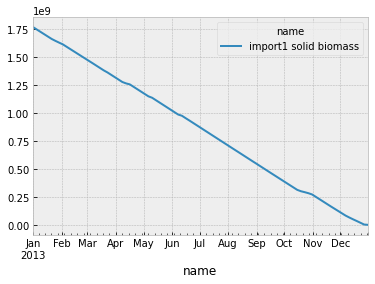

In [11]:
n.stores_t.e.filter(regex='import1 solid biomass').plot()

In [12]:
n.stores_t.e.filter(regex='import.*solid biomass').head()

name,import1 solid biomass,import2 solid biomass,import3 solid biomass,import4 solid biomass,import5 solid biomass,import6 solid biomass,import7 solid biomass,import8 solid biomass,import9 solid biomass
name,,,,,,,,,
2013-01-01 00:00:00,1.766589e+09,2.749506e+08,2.745417e+08,2.746826e+08,2.750325e+08,2.745695e+08,2.748458e+08,2.747546e+08,2.747557e+08
2013-01-05 01:00:00,1.745485e+09,2.716036e+08,2.712683e+08,2.715417e+08,2.717104e+08,2.713030e+08,2.715199e+08,2.716564e+08,2.716931e+08
2013-01-09 02:00:00,1.724392e+09,2.682538e+08,2.679927e+08,2.683939e+08,2.683888e+08,2.680303e+08,2.681865e+08,2.685570e+08,2.686310e+08
2013-01-13 03:00:00,1.703277e+09,2.649018e+08,2.647209e+08,2.652551e+08,2.650589e+08,2.647661e+08,2.648582e+08,2.654592e+08,2.655695e+08
2013-01-17 04:00:00,1.682194e+09,2.615542e+08,2.614461e+08,2.621089e+08,2.617396e+08,2.614946e+08,2.615272e+08,2.623605e+08,2.625087e+08


In [13]:
n.stores_t.e.filter(regex='import.*solid biomass')

name,import1 solid biomass,import2 solid biomass,import3 solid biomass,import4 solid biomass,import5 solid biomass,import6 solid biomass,import7 solid biomass,import8 solid biomass,import9 solid biomass
name,,,,,,,,,
2013-01-01 00:00:00,1.766589e+09,2.749506e+08,2.745417e+08,2.746826e+08,2.750325e+08,2.745695e+08,2.748458e+08,2.747546e+08,2.747557e+08
2013-01-05 01:00:00,1.745485e+09,2.716036e+08,2.712683e+08,2.715417e+08,2.717104e+08,2.713030e+08,2.715199e+08,2.716564e+08,2.716931e+08
2013-01-09 02:00:00,1.724392e+09,2.682538e+08,2.679927e+08,2.683939e+08,2.683888e+08,2.680303e+08,2.681865e+08,2.685570e+08,2.686310e+08
2013-01-13 03:00:00,1.703277e+09,2.649018e+08,2.647209e+08,2.652551e+08,2.650589e+08,2.647661e+08,2.648582e+08,2.654592e+08,2.655695e+08
2013-01-17 04:00:00,1.682194e+09,2.615542e+08,2.614461e+08,2.621089e+08,2.617396e+08,2.614946e+08,2.615272e+08,2.623605e+08,2.625087e+08
...,...,...,...,...,...,...,...,...,...
2013-12-14 14:00:00,4.944731e+07,6.316167e+06,7.013340e+06,9.437557e+06,6.202391e+06,7.465419e+06,6.852560e+06,9.335513e+06,1.484658e+07
2013-12-18 15:00:00,3.405689e+07,4.278578e+06,4.966541e+06,6.585447e+06,4.245976e+06,5.232586e+06,4.697090e+06,6.449588e+06,1.194297e+07
2013-12-22 16:00:00,1.828672e+07,2.458733e+06,2.876017e+06,3.722942e+06,2.487722e+06,3.102237e+06,2.695248e+06,3.680251e+06,9.037005e+06


In [14]:
n.links_t.p0.filter(regex='biomass to liquid').sum().sum() * 8760 /len(n.snapshots) * 3.6 / 1e9

7.713150512422728

In [15]:
n.loads_t.p_set.filter(regex='transport oil').sum().sum() * 3.6 / 1e9

0.017171333458102983

In [17]:
n.links_t.p0.filter(regex='Fischer-Tropsch').sum().sum() * 8760 / len(n.snapshots) *3.6 / 1e9 #EJ

8.392771293497554e-06

In [18]:
n.loads_t.p.filter(regex='land transport oil$|naphtha|kerosene|oil for shipping|oil boiler').sum().sum() * 8760 /len(n.snapshots) * 3.6 / 1e9

7.791061123369444

In [19]:
n.loads_t.p_set.filter(regex='land transport oil$|naphtha|kerosene|oil for shipping|oil boiler').sum()#.sum()# * 3.6 /1e9 #EJ

AL0 0 land transport oil     10312.311019
AT0 0 land transport oil    110166.002359
BA0 0 land transport oil      7221.142681
BE0 0 land transport oil    146804.224227
BG0 0 land transport oil     35046.508607
CH0 0 land transport oil     68985.912218
CZ0 0 land transport oil     87043.971785
DE0 0 land transport oil    764068.612683
DK0 0 land transport oil     41389.221195
DK3 0 land transport oil     22078.063652
EE6 0 land transport oil      9786.797339
ES0 0 land transport oil    420264.374917
ES2 0 land transport oil      5852.620907
FI3 0 land transport oil     70109.274423
FR0 0 land transport oil    720112.812149
GB4 0 land transport oil     15597.924018
GB5 0 land transport oil    551023.610871
GR0 0 land transport oil     84392.851515
HR0 0 land transport oil     29527.873158
HU0 0 land transport oil     50459.657260
IE4 0 land transport oil     53991.308300
IT0 0 land transport oil    576625.011196
IT1 0 land transport oil     15858.820180
LT6 0 land transport oil     23147

In [20]:
(n.links_t.p0.filter(regex='Fischer-Tropsch').sum().sum()+n.links_t.p0.filter(regex='biomass to liquid').sum().sum()) / n.loads_t.p.filter(regex='land transport oil$|naphtha|kerosene|oil for shipping|oil boiler').sum().sum()

0.990001077267671

In [21]:
n.loads_t.p.filter(regex='kerosene').sum() * 3.6 / 1e9

name
kerosene for aviation    0.022896
dtype: float64

In [22]:
n.loads.p_set.filter(regex='kerosene') * len(n.snapshots) * 3.6 / 1e9

name
kerosene for aviation    0.022896
Name: p_set, dtype: float64

In [23]:
(n.loads_t.p.filter(regex='kerosene').sum() * 3.6 / 1e9) / (n.loads.p_set.filter(regex='kerosene') * 3.6 / 1e9)

name
kerosene for aviation    91.0
dtype: float64

In [70]:
len(n.snapshots)#8761/97#n.generators_t.p.filter(regex='EU oil').sum() *3.6/1e6

91

In [24]:
n.stores_t.e.filter(regex='EU oil').tail(1)

name,EU oil Store
name,
2013-12-30 18:00:00,3.470699e+08


In [18]:
n.components["Load"]["attrs"]

,type,unit,default,description,status,static,varying,typ,dtype
attribute,,,,,,,,,
name,string,NaN,,Unique name,Input (required),True,False,<class 'str'>,object
bus,string,NaN,,Name of bus to which load is attached.,Input (required),True,False,<class 'str'>,object
type,string,NaN,,Placeholder for load type. Not yet implemented.,Input (optional),True,False,<class 'str'>,object
p_set,static or series,MW,0.0,Active power consumption (positive if the load...,Input (optional),True,True,<class 'float'>,float64
q_set,static or series,MVar,0.0,Reactive power consumption (positive if the lo...,Input (optional),True,True,<class 'float'>,float64
sign,float,NaN,-1.0,power sign (opposite sign to generator),Input (optional),True,False,<class 'float'>,float64
p,series,MW,0.0,active power at bus (positive if net load),Output,False,True,<class 'float'>,float64
q,series,MVar,0.0,reactive power (positive if net load),Output,False,True,<class 'float'>,float64


In [115]:
n.loads.p_set.filter(regex='naphtha|kerosene').sum() * 8760 * 3.6 / 1e9 #len(n.snapshots)

5.00668463019379

In [121]:
n.loads_t.p_set.filter(regex='land transport oil$').sum().sum()# *8760/len(n.snapshots)* 3.6 / 1e9

4769814.849473051

In [126]:
n.loads_t.p.filter(regex='land transport oil$').sum().sum()# * 3.6 / 1e9

4769814.849473051

In [131]:
n.loads.p_set.filter(regex='oil for shipping|oil boiler').sum() * 8760# *3.6 / 1e9#.sum()

314277716.0744887

In [5]:
n.links_t.p0.filter(regex='biomass to liquid').sum().sum() / n.loads_t.p.filter(regex='land transport oil$|naphtha|kerosene|oil for shipping|oil boiler').sum().sum()

1.6647314384829922e-08

In [26]:
n.links_t.p0.filter(regex='Fischer')#.sum()#.sum() / n.loads_t.p.filter(regex='land transport oil$|naphtha|kerosene|oil for shipping|oil boiler').sum().sum()

name,AL0 0 Fischer-Tropsch,AT0 0 Fischer-Tropsch,BA0 0 Fischer-Tropsch,BE0 0 Fischer-Tropsch,BG0 0 Fischer-Tropsch,CH0 0 Fischer-Tropsch,CZ0 0 Fischer-Tropsch,DE0 0 Fischer-Tropsch,DK0 0 Fischer-Tropsch,DK3 0 Fischer-Tropsch,...,MK0 0 Fischer-Tropsch,NL0 0 Fischer-Tropsch,NO3 0 Fischer-Tropsch,PL0 0 Fischer-Tropsch,PT0 0 Fischer-Tropsch,RO0 0 Fischer-Tropsch,RS0 0 Fischer-Tropsch,SE3 0 Fischer-Tropsch,SI0 0 Fischer-Tropsch,SK0 0 Fischer-Tropsch
name,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,0.004040,0.006496,0.004537,0.010529,0.016719,0.006808,0.006517,0.008355,0.010581,0.010417,...,0.003881,0.010664,0.008879,0.006897,0.016833,0.004046,0.004240,0.007598,0.005487,0.005835
2013-01-05 01:00:00,0.001358,0.001478,0.001418,0.001853,0.002185,0.001573,0.001475,0.001668,0.001684,0.001694,...,0.001336,0.001823,0.001654,0.001437,0.002678,0.001328,0.001373,0.001509,0.001472,0.001434
2013-01-09 02:00:00,0.001695,0.001936,0.001747,0.002323,0.003531,0.002018,0.001961,0.002153,0.002059,0.002067,...,0.001681,0.002369,0.002042,0.001785,0.004116,0.001808,0.001705,0.001973,0.001967,0.001837
2013-01-13 03:00:00,0.001373,0.001589,0.001432,0.002186,0.002272,0.001615,0.001526,0.001835,0.001729,0.001980,...,0.001356,0.002063,0.001892,0.001499,0.002758,0.001352,0.001396,0.001599,0.001542,0.001466
2013-01-17 04:00:00,0.001413,0.001553,0.001485,0.001993,0.003305,0.001667,0.001581,0.001823,0.001757,0.001755,...,0.001384,0.002026,0.001688,0.001526,0.003763,0.001380,0.001433,0.001619,0.001555,0.001498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-14 14:00:00,0.003050,0.005060,0.003460,0.006724,0.020039,0.005408,0.005552,0.006020,0.005873,0.005843,...,0.002896,0.006801,0.005698,0.005444,0.016395,0.003023,0.003183,0.005308,0.004184,0.004534
2013-12-18 15:00:00,0.003717,0.005024,0.003709,0.007804,0.026165,0.005426,0.005308,0.007391,0.009423,0.009271,...,0.003573,0.008040,0.008039,0.004925,0.015944,0.003241,0.003633,0.006349,0.004243,0.004676
2013-12-22 16:00:00,0.004490,0.005037,0.004671,0.007821,0.518605,0.005700,0.005483,0.005376,0.009444,0.009289,...,0.004339,0.007933,0.007402,0.004341,0.014890,0.004510,0.004670,0.005414,0.004733,0.004752


<AxesSubplot:xlabel='name'>

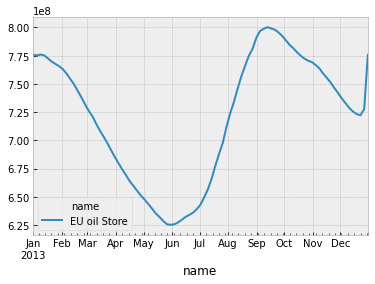

In [11]:
n.stores_t.e.filter(regex='EU oil').plot()

In [11]:
n.links.loc[n.links.carrier=='solid biomass transport']

,bus0,bus1,carrier,geometry,length,p_nom,tags,under_construction,underground,p_min_pu,...,c_v,p_nom_ratio,p_nom_opt,charger_ratio,liquid_biofuel_min,type,p_nom_max,p_set,p_max_pu,terrain_factor
name,,,,,,,,,,,,,,,,,,,,,
Biomass transport AL0 0 -> GR0 0,AL0 0 solid biomass,GR0 0 solid biomass,solid biomass transport,,471.526975,0.0,,NaN,NaN,0.0,...,NaN,NaN,14.329672,NaN,NaN,,inf,0.0,1.0,1.0
Biomass transport AL0 0 -> ME0 0,AL0 0 solid biomass,ME0 0 solid biomass,solid biomass transport,,187.645061,0.0,,NaN,NaN,0.0,...,NaN,NaN,35.266412,NaN,NaN,,inf,0.0,1.0,1.0
Biomass transport AL0 0 -> MK0 0,AL0 0 solid biomass,MK0 0 solid biomass,solid biomass transport,,176.051662,0.0,,NaN,NaN,0.0,...,NaN,NaN,41.883533,NaN,NaN,,inf,0.0,1.0,1.0
Biomass transport AL0 0 -> RS0 0,AL0 0 solid biomass,RS0 0 solid biomass,solid biomass transport,,358.275636,0.0,,NaN,NaN,0.0,...,NaN,NaN,18.828611,NaN,NaN,,inf,0.0,1.0,1.0
Biomass transport AT0 0 -> CH0 0,AT0 0 solid biomass,CH0 0 solid biomass,solid biomass transport,,519.527767,0.0,,NaN,NaN,0.0,...,NaN,NaN,12.924332,NaN,NaN,,inf,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Biomass transport NO3 0 -> NL0 0,NO3 0 solid biomass,NL0 0 solid biomass,solid biomass transport,,1218.171853,0.0,,NaN,NaN,0.0,...,NaN,NaN,6.042481,NaN,NaN,,inf,0.0,1.0,1.0
Biomass transport SE3 0 -> NO3 0,SE3 0 solid biomass,NO3 0 solid biomass,solid biomass transport,,516.645423,0.0,,NaN,NaN,0.0,...,NaN,NaN,12.522389,NaN,NaN,,inf,0.0,1.0,1.0
Biomass transport SE3 0 -> PL0 0,SE3 0 solid biomass,PL0 0 solid biomass,solid biomass transport,,1374.706964,0.0,,NaN,NaN,0.0,...,NaN,NaN,5.224024,NaN,NaN,,inf,0.0,1.0,1.0


In [10]:
n.links_t.p0.filter(regex='Biomass transport').sum().sum()  * 8760 / len(n.snapshots) *3.6 / 1e9 #EJ#p1#.filter(regex='solid biomass transport')

5.382483625552527e-06

In [6]:
n.links_t.p0.filter(regex='solid biomass').sum().sum()  * 8760 / len(n.snapshots) *3.6 / 1e9 #EJ

14.097939557341352

In [9]:
n.links_t.p0.filter(regex='Biomass transport').sum().sum()  * 8760 / len(n.snapshots) *3.6 / 1e9 #EJ#p1#.filter(regex='solid biomass transport')

5.382483625552527e-06

<AxesSubplot:xlabel='name'>

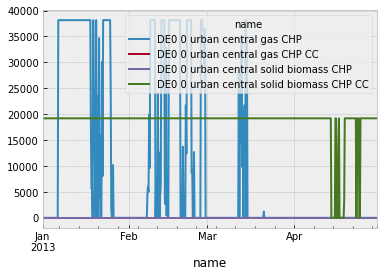

In [18]:
n.links_t.p0['2013-01':'2013-04'].filter(regex='DE.*CHP').plot()

In [4]:
n2 = pypsa.Network("results/hiB_testHiRes/postnetworks/elec_s_37_lvopt__Co2Lm0p05-5H-T-H-I-S600_2050.nc")

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2Lm0p05-5H-T-H-I-S600_2050.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


<AxesSubplot:xlabel='name'>

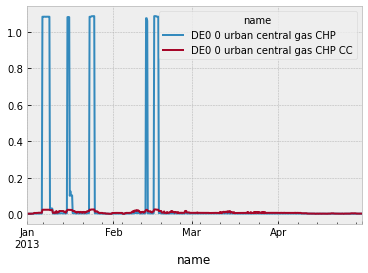

In [20]:
n2.links_t.p0['2013-01':'2013-04'].filter(regex='DE.*CHP').plot()

<AxesSubplot:xlabel='name'>

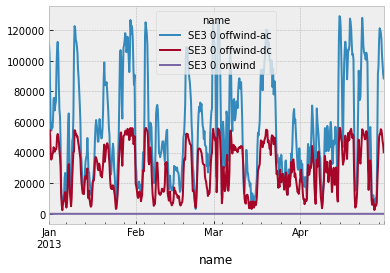

In [25]:
n2.generators_t.p['2013-01':'2013-04'].filter(regex='SE.*wind').plot()

<AxesSubplot:xlabel='name'>

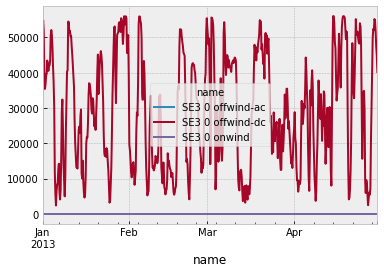

In [26]:
n.generators_t.p['2013-01':'2013-04'].filter(regex='SE.*wind').plot()

<AxesSubplot:xlabel='name'>

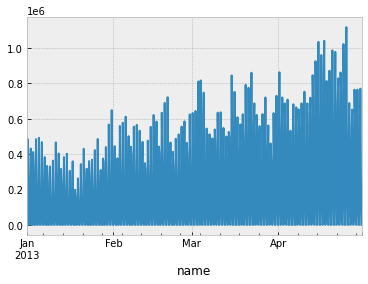

In [30]:
n.generators_t.p['2013-01':'2013-04'].filter(regex='solar').sum(axis=1).plot()

<AxesSubplot:xlabel='name'>

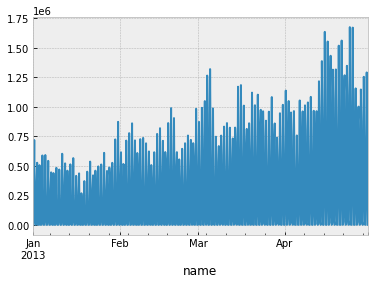

In [31]:
n2.generators_t.p['2013-01':'2013-04'].filter(regex='solar').sum(axis=1).plot()

<AxesSubplot:xlabel='name'>

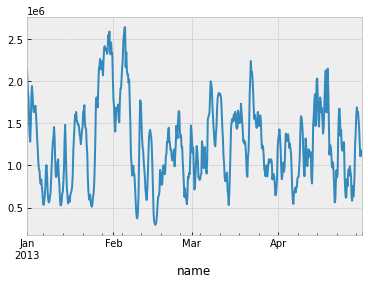

In [32]:
n2.generators_t.p['2013-01':'2013-04'].filter(regex='wind').sum(axis=1).plot()

<AxesSubplot:xlabel='name'>

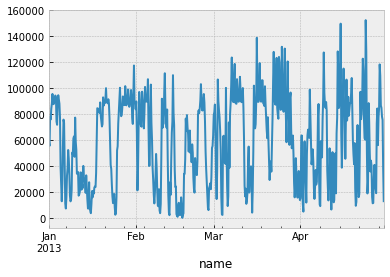

In [44]:
(n2.generators_t.p.filter(regex='wind|solar').sum().sum() - n.generators_t.p.filter(regex='wind|solar').sum().sum()) / 1e6

860.418344753685

In [45]:
n2.generators_t.p.filter(regex='wind|solar').sum().sum() / n.generators_t.p.filter(regex='wind|solar').sum().sum()

1.472057874637862

In [42]:
n2.links_t.p2.filter(regex='DAC').sum().sum() / 1e6

92.22371844778229

<AxesSubplot:xlabel='name'>

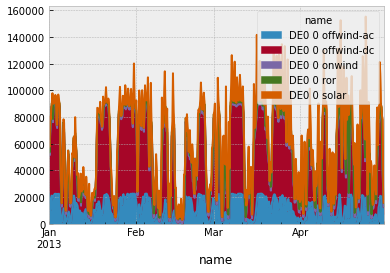

In [67]:
n.generators_t.p['2013-01':'2013-04'].filter(regex='DE.*wind|DE.*solar|DE.*ror').plot.area()

<AxesSubplot:xlabel='name'>

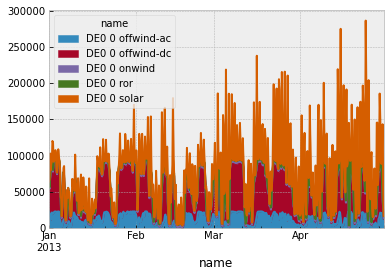

In [66]:
n2.generators_t.p['2013-01':'2013-04'].filter(regex='DE.*wind|DE.*solar|DE.*ror').plot.area()

<AxesSubplot:xlabel='name'>

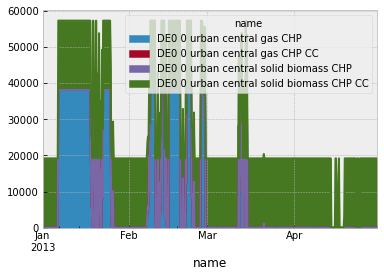

In [57]:
n.links_t.p0['2013-01':'2013-04'].filter(regex='DE.*CHP').plot.area()

In [78]:
n.links_t.p0['2013-01':'2013-04'].filter(regex='DE.*Electrolysis')#.plot.area()

<class 'pandas.core.frame.DataFrame'>


In [64]:
n.generators.groupby("carrier").p_nom_opt.sum()

carrier
forest residues solid biomass            2.188102e+05
gas                                      1.919910e-04
industry wood residues solid biomass     4.368341e+04
manureslurry digestible biomass          5.979515e+04
municipal biowaste digestible biomass    2.980403e+04
offwind-ac                               3.308555e+05
offwind-dc                               5.532794e+05
oil                                      1.087831e+05
onwind                                   1.027088e+06
poplar solid biomass                     2.037037e+04
ror                                      3.450392e+04
sewage sludge digestible biomass         2.222856e+03
solar                                    2.175986e+06
straw digestible biomass                 6.991375e+04
Name: p_nom_opt, dtype: float64

In [65]:
n2.generators.groupby("carrier").p_nom_opt.sum()

carrier
gas           8.137365e+04
offwind-ac    5.342872e+05
offwind-dc    6.120987e+05
oil           5.593260e+04
onwind        2.164268e+06
ror           3.450392e+04
solar         3.421484e+06
Name: p_nom_opt, dtype: float64

<AxesSubplot:xlabel='name'>

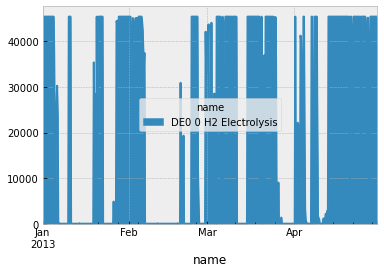

In [68]:
n2.links_t.p0['2013-01':'2013-04'].filter(regex='DE.*Electrolysis').plot.area()

In [76]:
p1 = '2013-10-01'
p2 = '2013-10-31'
solar = n.generators_t.p[p1:p2].filter(regex='solar').sum(axis=1)
onwind = n.generators_t.p[p1:p2].filter(regex='onwind').sum(axis=1)
offwind = n.generators_t.p[p1:p2].filter(regex='offwind').sum(axis=1)
hydro = n.generators_t.p[p1:p2].filter(regex='ror').sum(axis=1)
H2FC = n.links_t.p1[p1:p2].filter(regex='H2 Fuel Cell').sum(axis=1)
battery = n.links_t.p1[p1:p2].filter(regex='battery discharger').sum(axis=1)

d2 = n.links_t.p0[p1:p2].filter(regex='CHP').sum(axis=1)

h2prod = -n.links_t.p0[p1:p2].filter(regex='Electrolysis').sum(axis=1)
dac = -n.links_t.p2[p1:p2].filter(regex='DAC').sum(axis=1)

labels = ['Solar', 'Onwind', 'Offwind', 'Hydro', 'Fuel cell', 'Battery discharge', 'Electrolysis', 'DAC']
d3 = pd.concat([onwind,solar,offwind,hydro,d2,H2FC,battery,h2prod,dac], axis=1)
print(d3)
d3.columns = labels
fig, ax = plt.subplots()

d3.plot.area(ax=ax,linewidth=0.1,legend=labels)

#ax.stackplot(d3.index,d3.T.values,d3.T.columns)
#ax.legend(loc='upper left', ncol=4)
ax.legend(loc='upper center', bbox_to_anchor=(1.4, 0.8), shadow=True, ncol=1)
#fig, ax = plt.subplots()

                                 0              1              2  \
name                                                               
2013-10-01 03:00:00  365315.417632   90874.258210  573864.345645   
2013-10-01 08:00:00  432428.599346  709481.724685  593466.453305   
2013-10-01 13:00:00  409430.129349  306728.892824  585831.172701   
2013-10-01 18:00:00  458606.885402       0.000000  706499.576671   
2013-10-01 23:00:00  461240.366095       0.000000  661268.032575   
...                            ...            ...            ...   
2013-10-31 03:00:00  439225.725716   54944.103438  718589.320198   
2013-10-31 08:00:00  462428.034009  821909.965730  662249.366060   
2013-10-31 13:00:00  545021.892739  281178.421499  694052.350599   
2013-10-31 18:00:00  556280.176180       0.000000  765261.648652   
2013-10-31 23:00:00  513191.900891       0.000000  781706.148850   

                                3              4         5            6  \
name                                    

ValueError: Length mismatch: Expected axis has 9 elements, new values have 8 elements

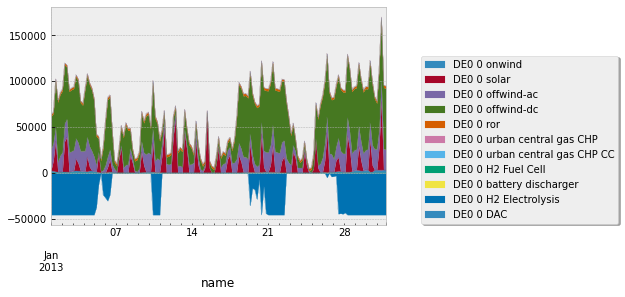

In [23]:
solar = n2.generators_t.p[p1:p2].filter(regex='DE.*solar')
onwind = n2.generators_t.p[p1:p2].filter(regex='DE.*onwind')
offwind = n2.generators_t.p[p1:p2].filter(regex='DE.*offwind')
hydro = n2.generators_t.p[p1:p2].filter(regex='DE.*ror')
H2FC = n2.links_t.p1[p1:p2].filter(regex='DE.*H2 Fuel Cell')
battery = n2.links_t.p1[p1:p2].filter(regex='DE.*battery discharger')

d2 = n2.links_t.p0[p1:p2].filter(regex='DE.*CHP')

h2prod = -n2.links_t.p0[p1:p2].filter(regex='DE.*Electrolysis')
dac = -n2.links_t.p2[p1:p2].filter(regex='DE.*DAC')

d3 = pd.concat([onwind,solar,offwind,hydro,d2,H2FC,battery,h2prod,dac], axis=1)


fig, ax = plt.subplots()
d3.plot.area(ax=ax,linewidth=0.1)

#ax.stackplot(d3.index,d3.T.values,d3.T.columns)
#ax.legend(loc='upper left', ncol=4)
ax.legend(loc='upper center', bbox_to_anchor=(1.4, 0.8), shadow=True, ncol=1)
#fig, ax = plt.subplots()

In [122]:

n2.links_t.p1[p1:p2].filter(regex='DE.*H2 Fuel Cell').sum()

name
DE0 0 H2 Fuel Cell   -0.572803
dtype: float64

In [130]:
n.links_t.p0.filter(regex='DE.*Electrolysis')

name,DE0 0 H2 Electrolysis
name,
2013-01-01 00:00:00,21625.350108
2013-01-01 05:00:00,14204.822295
2013-01-01 10:00:00,19008.465311
2013-01-01 15:00:00,11932.288548
2013-01-01 20:00:00,18174.304181
...,...
2013-12-30 23:00:00,21625.350229
2013-12-31 04:00:00,21625.350223
2013-12-31 09:00:00,21625.350229


name,DE0 0 DAC
name,
2013-01-01 00:00:00,-0.016980
2013-01-01 05:00:00,-0.016982
2013-01-01 10:00:00,-0.016987
2013-01-01 15:00:00,-0.016879
2013-01-01 20:00:00,-0.016891
...,...
2013-12-30 23:00:00,-0.016984
2013-12-31 04:00:00,-0.016988
2013-12-31 09:00:00,-0.017015


In [39]:
(n2.links_t.p0.filter(regex='H2 Electrolysis').sum().sum()-n.links_t.p0.filter(regex='H2 Electrolysis').sum().sum()) / 1e6

516.1056318198096

In [62]:
index = n.links.loc[n.links.carrier == 'DC'].index
(n2.links_t.p0[index].sum().sum() - n.links_t.p0[index].sum().sum()) / 1e6

#dict_you_want = { your_key: n.links_t.p0[your_key] for your_key in index}

-319.18790148912217

In [60]:
n2.links_t.p0[index].sum().sum() / 1e6

-815.5628085976537

In [63]:
n2.links_t.p0[index].sum().sum() / n.links_t.p0[index].sum().sum()

1.6430379475635586